In [64]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [65]:
pd.read_csv('C:\\Users\\amitko\\Desktop\\HW4\\titanic.csv')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [66]:
df=pd.read_csv('C:\\Users\\amitko\\Desktop\\HW4\\titanic.csv')

In [67]:
df.index

RangeIndex(start=0, stop=1309, step=1)

In [68]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

We added a column of "non-survived" in order to siplify our calculations going forward

In [69]:
df['non-survived']=0

for i in range(len(df)): 
    if (df['survived'][i]==0):
        df['non-survived'][i]=1    
    else:
        df['non-survived'][i]=0
           

C:\Users\amitko\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\amitko\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [70]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body,non-survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.618029
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922,0.486055
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000,1.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [71]:
df_sex=df[['sex','survived','non-survived']]
groupby_sex = df_sex.groupby('sex') 
groupby_sex.sum()

,survived,non-survived
sex,,
female,339,127
male,161,682


In order to understand survivors (general/by gender), we defined new variables.
SF=Survived Females
DF=Died Females
SM=Survived Males
DM=Died Males

In [72]:
SF=df["sex"][(df["survived"] == 1) & (df["sex"] == "female")]
DF=df["sex"][(df["survived"] == 0) & (df["sex"] == "female")]
SM=df["sex"][(df["survived"] == 1) & (df["sex"] == "male")]
DM=df["sex"][(df["survived"] == 0) & (df["sex"] == "male")]

Pie chart of Survivors

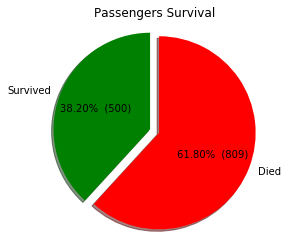

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=plt.figaspect(1))
values = [len(SM)+len(SF),len(DM)+len(DF)] 
labels = ['Survived','Died']
plt.title('Passengers Survival')
colors = ['g','red']
explode = (0, 0.1)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


plt.pie(values,colors=colors,explode=explode, labels=labels, autopct=make_autopct(values),shadow=True, startangle=90)
plt.axis('equal')
plt.show()

A chart of Survivors by gender

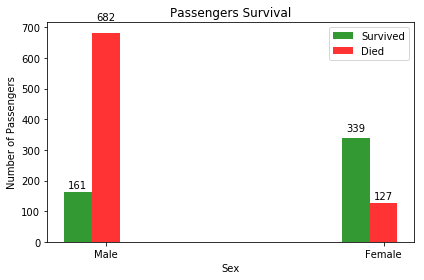

In [74]:
n_groups = 2
S = (len(SM),len(SF))
D = (len(DM),len(DF))
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8
 
rects1 = plt.bar(index, S, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')
 
rects2 = plt.bar(index + bar_width, D, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Died')
 
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Passengers Survival')
plt.xticks(index + bar_width, ('Male', 'Female'))
plt.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [75]:
df_sex=df[['sex','survived','non-survived']]
groupby_sex = df_sex.groupby('sex') 
groupby_sex.mean()

,survived,non-survived
sex,,
female,0.727468,0.272532
male,0.190985,0.809015


We performed T-Test in order to understand if there are statistical significant differences between survival of males and females

In [76]:
female_survived = df[df['sex'] == 'female']['survived']
male_survived = df[df['sex'] == 'male']['survived']
stats.ttest_ind(female_survived, male_survived)

Ttest_indResult(statistic=22.517977185525751, pvalue=3.7758923579450912e-95)

Indeed we found statistical significance, according to the pvalue

Chart of Survivors by Class
SC1=Survived Class 1
DC1=Died Class 1

In [77]:
SC1=df["pclass"][(df["survived"] == 1) & (df["pclass"] == 1)]
SC2=df["pclass"][(df["survived"] == 1) & (df["pclass"] == 2)]
SC3=df["pclass"][(df["survived"] == 1) & (df["pclass"] == 3)]
DC1=df["pclass"][(df["survived"] == 0) & (df["pclass"] == 1)]
DC2=df["pclass"][(df["survived"] == 0) & (df["pclass"] == 2)]
DC3=df["pclass"][(df["survived"] == 0) & (df["pclass"] == 3)]


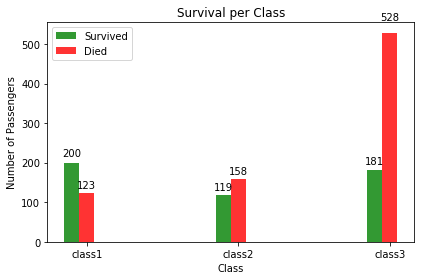

In [78]:
n_groups = 3

SS = (len(SC1) ,len(SC2),len(SC3))
DD = (len(DC1),len(DC2),len(DC3))
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, SS, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')
 
rects2 = plt.bar(index + bar_width, DD, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Died')
 
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.title('Survival per Class')
plt.xticks(index + bar_width, ('class1','class2','class3'))

plt.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)


plt.tight_layout()
plt.show()

In [79]:
df_pclass=df[['pclass','survived','non-survived']]
groupby_pclass = df_pclass.groupby('pclass') 
groupby_pclass.mean()

,survived,non-survived
pclass,,
1,0.619195,0.380805
2,0.429603,0.570397
3,0.255289,0.744711


We were looking to see the histogram of ages

In [80]:
Age=df['age']


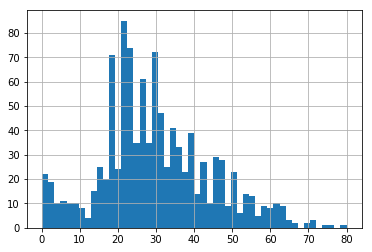

In [81]:
Age.hist(bins=50)
plt.show()

We divided all ages into intervals of 10

In [82]:
for i in range(len(df)): 
    if pd.isnull(df['age'][i]):
        df['age'][i]=0

C:\Users\amitko\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
df['age_group']=0

for i in range(len(df)):
    if (df['age'][i]>0 and df['age'][i]<=10):
        df['age_group'][i]=10
    elif (df['age'][i]>10 and df['age'][i]<=20):
        df['age_group'][i]=20
    elif (df['age'][i]>20 and df['age'][i]<=30):
        df['age_group'][i]=30
    elif (df['age'][i]>30 and df['age'][i]<=40):
        df['age_group'][i]=40
    elif (df['age'][i]>40 and df['age'][i]<=50):
        df['age_group'][i]=50
    elif (df['age'][i]>50 and df['age'][i]<=60):
        df['age_group'][i]=60
    elif (df['age'][i]>60 and df['age'][i]<=70):
        df['age_group'][i]=70
    elif (df['age'][i]>70 and df['age'][i]<=80):
        df['age_group'][i]=80
    elif (df['age'][i]>80 and df['age'][i]<=90):
        df['age_group'][i]=90
    else:
         df['age_group'][i]=0  

C:\Users\amitko\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\amitko\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\amitko\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\amitko\AppData\L

In [84]:
Age_s=df[["age","survived","age_group"]]

Ages0s=len(Age_s["age_group"][(Age_s["survived"] == 1)&(Age_s['age_group']==0)])
Ages10s=len(Age_s["age_group"][(Age_s["survived"] == 1)&(Age_s['age_group']==10)])
Ages20s=len(Age_s["age_group"][(Age_s["survived"] == 1)&(Age_s['age_group']==20)])
Ages30s=len(Age_s["age_group"][(Age_s["survived"] == 1)&(Age_s['age_group']==30)])
Ages40s=len(Age_s["age_group"][(Age_s["survived"] == 1)&(Age_s['age_group']==40)])
Ages50s=len(Age_s["age_group"][(Age_s["survived"] == 1)&(Age_s['age_group']==50)])
Ages60s=len(Age_s["age_group"][(Age_s["survived"] == 1)&(Age_s['age_group']==60)])
Ages70s=len(Age_s["age_group"][(Age_s["survived"] == 1)&(Age_s['age_group']==70)])
Ages80s=len(Age_s["age_group"][(Age_s["survived"] == 1)&(Age_s['age_group']==80)])
Ages90s=len(Age_s["age_group"][(Age_s["survived"] == 1)&(Age_s['age_group']==90)])
Ages0d=len(Age_s["age_group"][(Age_s["survived"] == 0)&(Age_s['age_group']==0)])
Ages10d=len(Age_s["age_group"][(Age_s["survived"] == 0)&(Age_s['age_group']==10)])
Ages20d=len(Age_s["age_group"][(Age_s["survived"] == 0)&(Age_s['age_group']==20)])
Ages30d=len(Age_s["age_group"][(Age_s["survived"] == 0)&(Age_s['age_group']==30)])
Ages40d=len(Age_s["age_group"][(Age_s["survived"] == 0)&(Age_s['age_group']==40)])
Ages50d=len(Age_s["age_group"][(Age_s["survived"] == 0)&(Age_s['age_group']==50)])
Ages60d=len(Age_s["age_group"][(Age_s["survived"] == 0)&(Age_s['age_group']==60)])
Ages70d=len(Age_s["age_group"][(Age_s["survived"] == 0)&(Age_s['age_group']==70)])
Ages80d=len(Age_s["age_group"][(Age_s["survived"] == 0)&(Age_s['age_group']==80)])
Ages90d=len(Age_s["age_group"][(Age_s["survived"] == 0)&(Age_s['age_group']==90)])


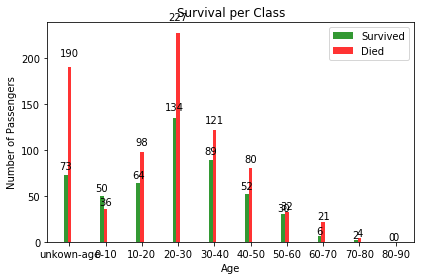

In [85]:
n_groups = 10

SS = (Ages0s,Ages10s,Ages20s,Ages30s,Ages40s,Ages50s,Ages60s,Ages70s,Ages80s,Ages90s)
DD = (Ages0d,Ages10d,Ages20d,Ages30d,Ages40d,Ages50d,Ages60d,Ages70d,Ages80d,Ages90d)
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, SS, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')
 
rects2 = plt.bar(index + bar_width, DD, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Died')
 
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Survival per Class')
plt.xticks(index + bar_width, ('unkown-age','0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'))

plt.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)


plt.tight_layout()
plt.show()

In [86]:
df_age=df[['age_group','survived','non-survived']]
groupby_age = df_age.groupby('age_group') 
groupby_age.mean()

,survived,non-survived
age_group,,
0,0.277567,0.722433
10,0.581395,0.418605
20,0.395062,0.604938
30,0.371191,0.628809
40,0.423810,0.576190
50,0.393939,0.606061
60,0.483871,0.516129
70,0.222222,0.777778
80,0.333333,0.666667


We checked the correlation between sibsp and survived:

In [87]:
Sibsp_Check=df[['sibsp', 'survived']]
from scipy import stats
import numpy as np 
from statsmodels.formula.api import ols 
model = ols("sibsp ~ survived", Sibsp_Check).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sibsp   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.013
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.314
Time:                        14:22:30   Log-Likelihood:                -1909.8
No. Observations:                1309   AIC:                             3824.
Df Residuals:                    1307   BIC:                             3834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5216      0.037     14.243      0.0

A chart of survivors by number of siblings:

In [88]:
SSB0=len(df["sibsp"][(df["survived"] == 1) & (df["sibsp"] == 0)])
SSB1=len(df["sibsp"][(df["survived"] == 1) & (df["sibsp"] == 1)])
SSB2=len(df["sibsp"][(df["survived"] == 1) & (df["sibsp"] == 2)])
SSB3=len(df["sibsp"][(df["survived"] == 1) & (df["sibsp"] == 3)])
SSB4=len(df["sibsp"][(df["survived"] == 1) & (df["sibsp"] == 4)])
SSB5=len(df["sibsp"][(df["survived"] == 1) & (df["sibsp"] == 5)])
SSB6=len(df["sibsp"][(df["survived"] == 1) & (df["sibsp"] == 6)])
SSB7=len(df["sibsp"][(df["survived"] == 1) & (df["sibsp"] == 7)])
SSB8=len(df["sibsp"][(df["survived"] == 1) & (df["sibsp"] == 8)])
SDB0=len(df["sibsp"][(df["survived"] == 0) & (df["sibsp"] == 0)])
SDB1=len(df["sibsp"][(df["survived"] == 0) & (df["sibsp"] == 1)])
SDB2=len(df["sibsp"][(df["survived"] == 0) & (df["sibsp"] == 2)])
SDB3=len(df["sibsp"][(df["survived"] == 0) & (df["sibsp"] == 3)])
SDB4=len(df["sibsp"][(df["survived"] == 0) & (df["sibsp"] == 4)])
SDB5=len(df["sibsp"][(df["survived"] == 0) & (df["sibsp"] == 5)])
SDB6=len(df["sibsp"][(df["survived"] == 0) & (df["sibsp"] == 6)])
SDB7=len(df["sibsp"][(df["survived"] == 0) & (df["sibsp"] == 7)])
SDB8=len(df["sibsp"][(df["survived"] == 0) & (df["sibsp"] == 8)])

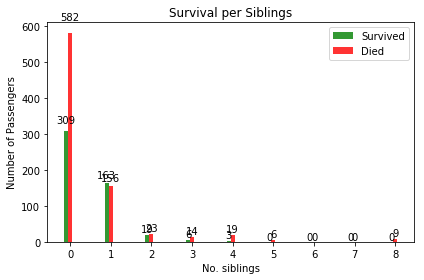

In [89]:
n_groups = 9

SS = (SSB0,SSB1,SSB2,SSB3,SSB4,SSB5,SSB6,SSB7,SSB8)
DD = (SDB0,SDB1,SDB2,SDB3,SDB4,SDB5,SDB6,SDB7,SDB8)
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, SS, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')
 
rects2 = plt.bar(index + bar_width, DD, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Died')
 
plt.xlabel('No. siblings')
plt.ylabel('Number of Passengers')
plt.title('Survival per Siblings')
plt.xticks(index + bar_width, (0,1,2,3,4,5,6,7,8))

plt.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)


plt.tight_layout()
plt.show()

In [111]:
df_sibsp=df[['sibsp','survived','non-survived']]
groupby_sibsp = df_sibsp.groupby('sibsp') 
groupby_sibsp.mean()

,survived,non-survived
sibsp,,
0,0.346801,0.653199
1,0.510972,0.489028
2,0.452381,0.547619
3,0.300000,0.700000
4,0.136364,0.863636
5,0.000000,1.000000
8,0.000000,1.000000


We checked correlation between parch and survived:

In [112]:
Parch_Check=df[['parch', 'survived']]
from scipy import stats
import numpy as np 
from statsmodels.formula.api import ols 
model = ols("parch ~ survived", Parch_Check).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  parch   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.992
Date:                Sat, 03 Feb 2018   Prob (F-statistic):            0.00276
Time:                        14:27:21   Log-Likelihood:                -1663.4
No. Observations:                1309   AIC:                             3331.
Df Residuals:                    1307   BIC:                             3341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3288      0.030     10.838      0.0

In [113]:
SSB0=len(df["parch"][(df["survived"] == 1) & (df["parch"] == 0)])
SSB1=len(df["parch"][(df["survived"] == 1) & (df["parch"] == 1)])
SSB2=len(df["parch"][(df["survived"] == 1) & (df["parch"] == 2)])
SSB3=len(df["parch"][(df["survived"] == 1) & (df["parch"] == 3)])
SSB4=len(df["parch"][(df["survived"] == 1) & (df["parch"] == 4)])
SSB5=len(df["parch"][(df["survived"] == 1) & (df["parch"] == 5)])
SSB6=len(df["parch"][(df["survived"] == 1) & (df["parch"] == 6)])
SSB7=len(df["parch"][(df["survived"] == 1) & (df["parch"] == 7)])
SSB8=len(df["parch"][(df["survived"] == 1) & (df["parch"] == 8)])
SSB9=len(df["parch"][(df["survived"] == 1) & (df["parch"] == 9)])
SDB0=len(df["parch"][(df["survived"] == 0) & (df["parch"] == 0)])
SDB1=len(df["parch"][(df["survived"] == 0) & (df["parch"] == 1)])
SDB2=len(df["parch"][(df["survived"] == 0) & (df["parch"] == 2)])
SDB3=len(df["parch"][(df["survived"] == 0) & (df["parch"] == 3)])
SDB4=len(df["parch"][(df["survived"] == 0) & (df["parch"] == 4)])
SDB5=len(df["parch"][(df["survived"] == 0) & (df["parch"] == 5)])
SDB6=len(df["parch"][(df["survived"] == 0) & (df["parch"] == 6)])
SDB7=len(df["parch"][(df["survived"] == 0) & (df["parch"] == 7)])
SDB8=len(df["parch"][(df["survived"] == 0) & (df["parch"] == 8)])
SDB9=len(df["parch"][(df["survived"] == 0) & (df["parch"] == 9)])

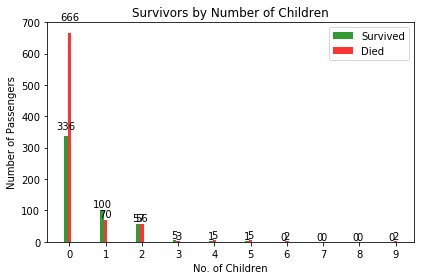

In [115]:
n_groups = 10

SS = (SSB0,SSB1,SSB2,SSB3,SSB4,SSB5,SSB6,SSB7,SSB8,SSB9)
DD = (SDB0,SDB1,SDB2,SDB3,SDB4,SDB5,SDB6,SDB7,SDB8,SDB9)
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, SS, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')
 
rects2 = plt.bar(index + bar_width, DD, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Died')
 
plt.xlabel('No. of Children')
plt.ylabel('Number of Passengers')
plt.title('Survivors by Number of Children')
plt.xticks(index + bar_width, (0,1,2,3,4,5,6,7,8,9))

plt.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)


plt.tight_layout()
plt.show()

In [116]:
df_parch=df[['parch','survived','non-survived']]
groupby_parch = df_parch.groupby('parch') 
groupby_parch.mean()

,survived,non-survived
parch,,
0,0.335329,0.664671
1,0.588235,0.411765
2,0.504425,0.495575
3,0.625000,0.375000
4,0.166667,0.833333
5,0.166667,0.833333
6,0.000000,1.000000
9,0.000000,1.000000


In order to investigate better the boat data, we assigned 0 for cells with NaN value

In [118]:
for i in range(len(df)): 
    if pd.isnull(df['boat'][i]):
        df['boat'][i]=0

In [119]:
df_boat=df[['boat','survived','non-survived']]
groupby_boat = df_boat.groupby('boat') 
groupby_boat.mean()

,survived,non-survived
boat,,
0,0.027947,0.972053
1,1.000000,0.000000
10,1.000000,0.000000
11,1.000000,0.000000
12,0.947368,0.052632
13,1.000000,0.000000
13 15,1.000000,0.000000
13 15 B,1.000000,0.000000
14,0.969697,0.030303


Following the above analysis, we decided to divide "boat" to two categories: passengers who used boats (1) and passengers who didn't use boats(0)

In [120]:
df['On_Boat']=0

for i in range(len(df)):
    if (df['boat'][i]==0):
        df['On_Boat'][i]=0
    else:
        df['On_Boat'][i]=1
             

C:\Users\amitko\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\amitko\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


We checked correlation between On_Boat and survived, and found very high correlation

In [98]:
On_Boat=df[['On_Boat', 'survived']]
from scipy import stats
import numpy as np 
from statsmodels.formula.api import ols 
model = ols("On_Boat ~ survived", On_Boat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                On_Boat   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 1.164e+04
Date:                Sat, 03 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:24:08   Log-Likelihood:                 595.77
No. Observations:                1309   AIC:                            -1188.
Df Residuals:                    1307   BIC:                            -1177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0111      0.005      2.060      0.0

For the prediction we wanted to give value to sex parameter: Male(0) and Female(1)

In [99]:
df['sex_value']=0

for i in range(len(df)):
    if (df['sex'][i]=="male"):
        df['sex_value'][i]=0
    else:
        df['sex_value'][i]=1

C:\Users\amitko\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\amitko\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


We decided to test 4 combinations of train data and predict with 2 different algorithms: KNN and CVM

In [159]:
test=df[['pclass','survived','sex_value','age','sibsp','parch','boat','non-survived','age_group','On_Boat']]


In [167]:
train=test[['pclass','sex_value','age_group','On_Boat','sibsp','parch']]
target=test['survived']
train1=test[['pclass','sibsp','parch','age_group']]
target1=test['survived']
train2=test[['pclass','sex_value','On_Boat']]
target2=test['survived']
train3=test[['pclass','sibsp','sex_value','parch','age_group']]
target3=test['survived']

In [168]:
from sklearn import neighbors 
knn = neighbors.KNeighborsClassifier(3) 
knn.fit(train[:1000], target[:1000])
knn.score(train[1000:], target[1000:])


0.92233009708737868

In [169]:
from sklearn import svm 
svc = svm.SVC(kernel='linear') 
svc.fit(train[:1000], target[:1000]) 
svc.score(train[1000:], target[1000:])

0.96763754045307449

In [170]:
from sklearn import neighbors 
knn = neighbors.KNeighborsClassifier(3) 
knn.fit(train1[:1000], target1[:1000])
knn.score(train1[1000:], target1[1000:])


0.55016181229773464

In [171]:
from sklearn import svm 
svc = svm.SVC(kernel='linear') 
svc.fit(train1[:1000], target1[:1000]) 
svc.score(train1[1000:], target1[1000:])

0.7508090614886731

In [172]:
from sklearn import neighbors 
knn = neighbors.KNeighborsClassifier(3) 
knn.fit(train2[:1000], target2[:1000])
knn.score(train2[1000:], target2[1000:])

0.96763754045307449

In [173]:
from sklearn import svm  
svc = svm.SVC(kernel='linear') 
svc.fit(train2[:1000], target2[:1000]) 
svc.score(train2[1000:], target2[1000:])

0.96763754045307449

In [109]:
from sklearn import neighbors 
knn = neighbors.KNeighborsClassifier(3) 
knn.fit(train3[:1000], target3[:1000])
knn.score(train3[1000:], target3[1000:])

0.76051779935275077

In [110]:
from sklearn import svm 
svc = svm.SVC(kernel='linear') 
svc.fit(train3[:1000], target3[:1000]) 
svc.score(train3[1000:], target3[1000:])

0.76051779935275077

We found that the best prediction was given by both algorithms when using the train data: train2=test[['pclass','sex_value','On_Boat']]